In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbs

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Preprocessing in train data

In [3]:
# reading train data
df = pd.read_csv("/home/himanshu/Deloitte Case Study/data.csv", index_col=0)

In [4]:
# printing first 5 columns to get a overall idea about the data 
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


In [5]:
# checking the dimention of the data
df.shape

(40935, 14)

In [6]:
# checking for missing values
df.isnull().sum()/len(df)

Age              0.066960
WorkClass        0.068132
fnlwgt           0.068059
Education        0.067009
EducationNum     0.068474
MaritalStatus    0.071430
Occupation       0.067400
Relationship     0.068768
Gender           0.066618
CapitalGain      0.068548
CapitalLoss      0.066398
HoursPerWeek     0.065470
NativeCountry    0.066667
Income           0.000000
dtype: float64

In [7]:
# printing data types for imputation of missing values
df.dtypes

Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
Income            object
dtype: object

In [8]:
# Checking the values of dependent variable 'Income'
df['Income'].value_counts()

 <=50K     21121
 <=50K.    10002
 >50K       6719
 >50K.      3093
Name: Income, dtype: int64

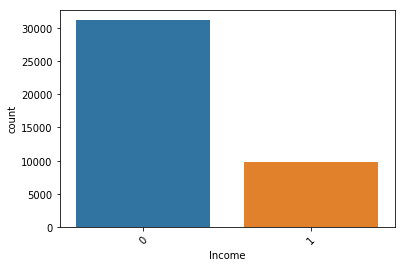

In [9]:
# combining Income class values to <=50K and >50K
df['Income'] = df['Income'].replace([' <=50K', ' <=50K.'],0)
df['Income'] = df['Income'].replace([' >50K', ' >50K.'],1)
sbs.countplot(x='Income', data=df);
plt.xticks(rotation=45);

In [10]:
# Checking values of Income column
df['Income'].value_counts()

0    31123
1     9812
Name: Income, dtype: int64

In [11]:
# Define function to check distribution of Age vs Income 

def num_income(df,col_name):
    temp = pd.DataFrame()
    temp[col_name] = pd.cut(df[col_name],bins=8,right=True,precision=0,labels=["17.0- 26.0" , "26.0- 35.0" , "35.0- 44.0" , "44.0- 54.0" , "54.0- 63.0" , "63.0- 72.0" , "72.0- 81.0" , "81.0- 90.0"])
    temp['Income'] = df['Income']
    temp = pd.DataFrame(temp.groupby([col_name,'Income']).size()).reset_index().rename(columns={0:'freq'})
    unique_col_name = temp[col_name].unique().tolist()
    required_df = pd.DataFrame()
    for i in unique_col_name:
        temp_df = temp[temp[col_name]==i][['freq']].reset_index(drop=True).T.rename(columns={0:'<=50k',1:'>50k'},index={'freq':i})
        required_df = required_df.append(temp_df)
    return required_df

In [12]:
# Calling function with Age Variable
required_df = num_income(df,'Age')

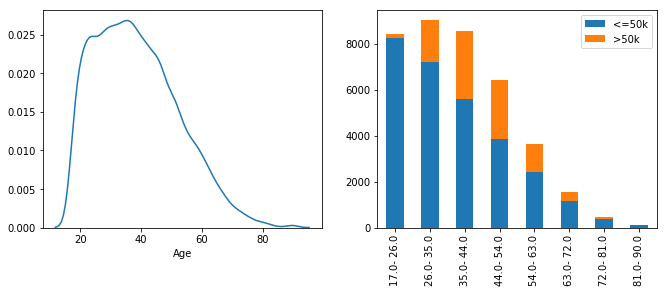

In [13]:
# Plotting Age vs Income stacked bar chart
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(11,4))
sbs.distplot(df['Age'],hist=False,norm_hist=False,ax=ax1)
required_df.plot.bar(stacked=True,ax=ax2)

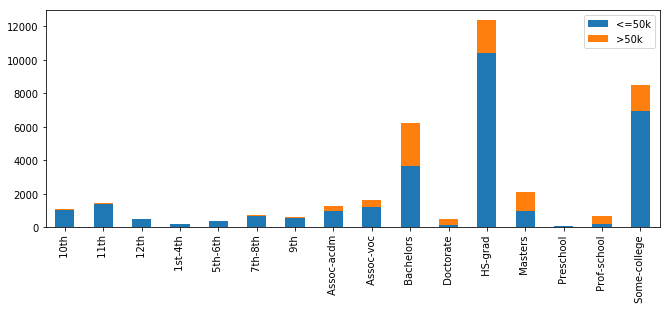

In [14]:
# Defining function to plot Categorical Variable vs Income stacked bar chart and calling function for Education variable

def cat_income(df,col_name):
    temp = df[[col_name,'Income']]
    temp = pd.DataFrame(temp.groupby([col_name,'Income']).size()).reset_index().rename(columns={0:'freq'})
    unique_col_name = temp[col_name].unique().tolist()
    required_df = pd.DataFrame()
    for i in unique_col_name:
        temp_df = temp[temp[col_name]==i][['freq']].reset_index(drop=True).T.rename(columns={0:'<=50k',1:'>50k'},index={'freq':i})
        required_df = required_df.append(temp_df)
    return required_df
required_df = cat_income(df,'Education')
required_df.plot.bar(stacked=True,figsize=(11,4))

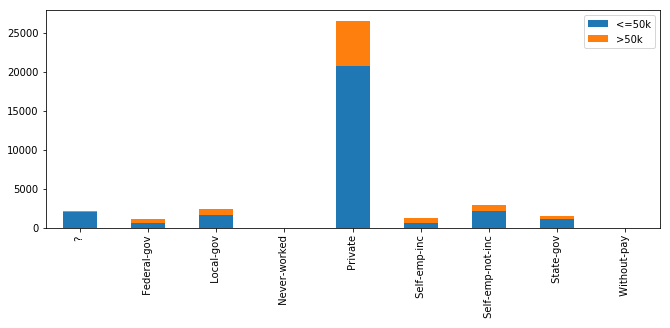

In [15]:
# Calling cat_income for WorkClass Variable
required_df = cat_income(df,'WorkClass')
required_df.plot.bar(stacked=True,figsize=(11,4))

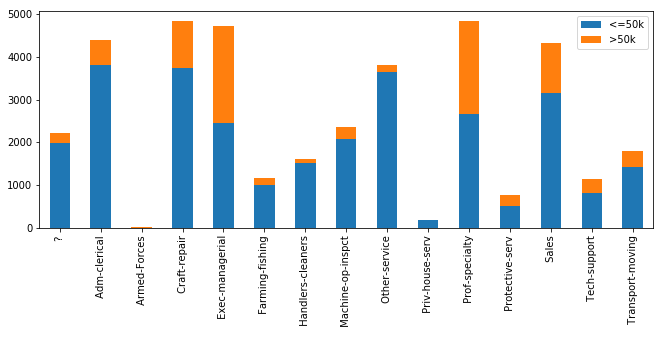

In [16]:
# Calling cat_income for Occupation Variable

required_df = cat_income(df,'Occupation')
required_df.plot.bar(stacked=True,figsize=(11,4))

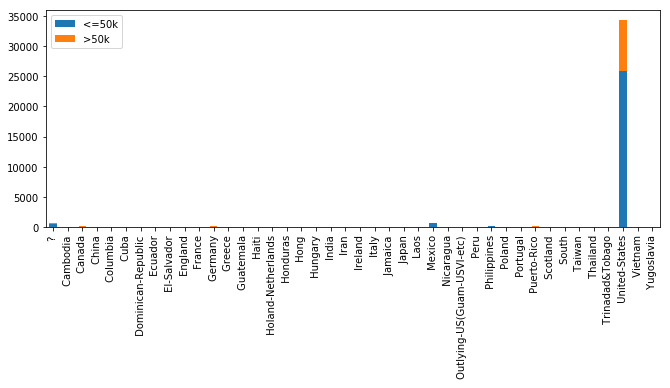

In [17]:
# Calling cat_income for NativeCountry Variable

required_df = cat_income(df,'NativeCountry')
required_df.plot.bar(stacked=True,figsize=(11,4))